In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'column_a': [1, 2, 4, 4, np.nan, np.nan, 6],
    'column_b': [1.2, 1.4, np.nan, 6.2, None, 1.1, 4.3],
    'column_c': ['a', '?', 'c', 'd', '', np.nan, 'd'],
    'column_d': [True, True, np.nan, None, False, True, False]
})


In [2]:
df

,column_a,column_b,column_c,column_d
0,1.0,1.2,a,True
1,2.0,1.4,?,True
2,4.0,NaN,c,NaN
3,4.0,6.2,d,None
4,NaN,NaN,,False
5,NaN,1.1,NaN,True
6,6.0,4.3,d,False


In [3]:
new = pd.Series([1,2,np.nan,4,np.nan,5],dtype = pd.Int64Dtype())
df['column_e'] = new

In [4]:
df

,column_a,column_b,column_c,column_d,column_e
0,1.0,1.2,a,True,1
1,2.0,1.4,?,True,2
2,4.0,NaN,c,NaN,<NA>
3,4.0,6.2,d,None,4
4,NaN,NaN,,False,<NA>
5,NaN,1.1,NaN,True,5
6,6.0,4.3,d,False,<NA>


pandas provides isnull(), isna() functions to detect missing values. both of them do the same thing.
df.isna() return the dataframe with boolean values(true, false) indicating missing values.
notna() is the opposite of isna()

df.isna().any() return a boolean value for each column.
if there is at least one missing value inthat column, the result is true.
df.isna().sum() return the number of missing values in each column.


In [5]:
df.isna().any()

column_a    True
column_b    True
column_c    True
column_d    True
column_e    True
dtype: bool

In [6]:
df.isna().sum()

column_a    2
column_b    2
column_c    1
column_d    2
column_e    3
dtype: int64

finding and treating non-information values as misssing values
use na_values parameter

In [5]:
missing_values = ["?","--"]
df_test=pd.read_csv("dataset.csv",na_values=missing_values)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

use pandas replace() function.
inplace parameter saves the changes in the dataframe
default value for inplace is false; if it is set to true changes are saved

In [16]:
df.replace({"?": np.nan, "--": np.nan, "": np.nan, pd.NA: np.nan}, inplace=True)

In [17]:
df

,column_a,column_b,column_c,column_d,column_e
0,1.0,1.2,a,True,1
1,2.0,1.4,NaN,True,2
2,4.0,NaN,c,NaN,<NA>
3,4.0,6.2,d,NaN,4
4,NaN,NaN,NaN,False,<NA>
5,NaN,1.1,NaN,True,5
6,6.0,4.3,d,False,<NA>


dropna() function
drop a row or column with missing values using dropna() function.
the 'how' parameter is used to set the condition to drop
how='any' : drop if there is any missing value
how='all' : drop if all values are missing
using the 'thresh' parameter, we can set a threshold for the number of non-NA values in order for a row/column to be dropped.

In [19]:
print(df.dropna(axis=0, how='all'))
print(df.dropna(axis=0, how='any'))


   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1
1       2.0       1.4      NaN     True         2
2       4.0       NaN        c      NaN      <NA>
3       4.0       6.2        d      NaN         4
4       NaN       NaN      NaN    False      <NA>
5       NaN       1.1      NaN     True         5
6       6.0       4.3        d    False      <NA>
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1


In [14]:
df.dropna(axis=0,inplace=True)
df

,column_a,column_b,column_c,column_d,column_e
0,1.0,1.2,a,True,1


In [15]:
df.dropna(axis=0, thresh=3,inplace=True)
df#setting thresh parameter to 3 will drop rows with less than 3non-na value

,column_a,column_b,column_c,column_d,column_e
0,1.0,1.2,a,True,1


In [16]:
#fillna() function replace missing value
df.fillna(24)

C:\Users\leeminwoo\AppData\Local\Temp\ipykernel_39044\3112756861.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(24)


,column_a,column_b,column_c,column_d,column_e
0,1.0,1.2,a,True,1


In [23]:
mean = df['column_a'].mean()
print(mean)
df['column_a'].fillna(mean)


3.4
0    1.0
1    2.0
2    4.0
3    4.0
4    3.4
5    3.4
6    6.0
Name: column_a, dtype: float64


In [ ]:
#ffill (forward fill) replaces missing values with the values in the previous row
#bfill(backward fill)is the opposite

In [19]:
data = np.array([3., np.nan, 2., 5., '*', 4., 5., 6., '+', 3., 2., '&', 5., np.nan, 7., '!'])
data  = data.reshape((4,4))
df1 = pd.DataFrame(data)
df1

,0,1,2,3
0,3.0,nan,2.0,5.0
1,*,4.0,5.0,6.0
2,+,3.0,2.0,&
3,5.0,nan,7.0,!


In [20]:
df.apply(pd.to_numeric,errors='coerce')
# Display the DataFrame after replacing non-numeric values
print("\nDataFrame after replacing non-numeric values with NaN:")
print(df)

# Apply isna with any, and sum
print("\nisna with any:")
print(df.isna().any())
print("\nsum of isna:")
print(df.isna().sum())

# Apply dropna with how any, how all, thresh 1, thresh 2
print("\ndropna with how any:")
print(df.dropna(how='any'))
print("\ndropna with how all:")
print(df.dropna(how='all'))
print("\ndropna with thresh 1:")
print(df.dropna(thresh=1))
print("\ndropna with thresh 2:")
print(df.dropna(thresh=2))

# Apply fillna with 100, mean, median
print("\nfillna with 100:")
print(df.fillna(100))
print("\nfillna with mean:")
print(df.fillna(df.mean()))
print("\nfillna with median:")
print(df.fillna(df.median()))

# Apply ffill, bfill
print("\nffill:")
print(df.ffill())
print("\nbfill:")
print(df.bfill())


DataFrame after replacing non-numeric values with NaN:
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1

isna with any:
column_a    False
column_b    False
column_c    False
column_d    False
column_e    False
dtype: bool

sum of isna:
column_a    0
column_b    0
column_c    0
column_d    0
column_e    0
dtype: int64

dropna with how any:
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1

dropna with how all:
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1

dropna with thresh 1:
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1

dropna with thresh 2:
   column_a  column_b column_c column_d  column_e
0       1.0       1.2        a     True         1

fillna with 100:
   column_a  column_b column_c  column_d  column_e
0       1.0       1.2        a      True         1

fillna with mean:


C:\Users\leeminwoo\AppData\Local\Temp\ipykernel_39044\443272777.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.fillna(100))


TypeError: Could not convert ['a' True] to numeric

: 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
train_url ="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url ="http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [27]:
print("***** Train_Set *****")
print(train.head()) # print top n rows, n=5 default
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [28]:
# For the train set
train.isna().head()
# For the test set
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [32]:
train_numeric = train.select_dtypes(include=[np.number])
train_numeric.fillna(train_numeric.mean(), inplace=True)

In [36]:
for column in train.select_dtypes(include=[np.number]).columns:
    mean_value = train[column].mean()
    train.fillna({column:mean_value}, inplace=True)

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [40]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
train[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Survived',
ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


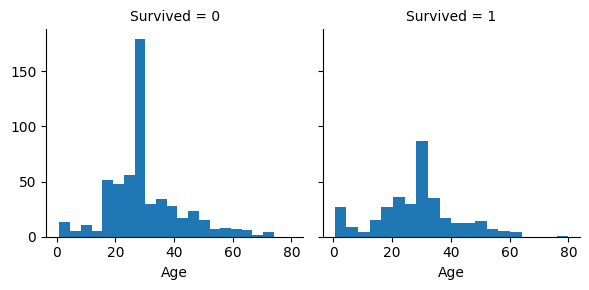

In [42]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


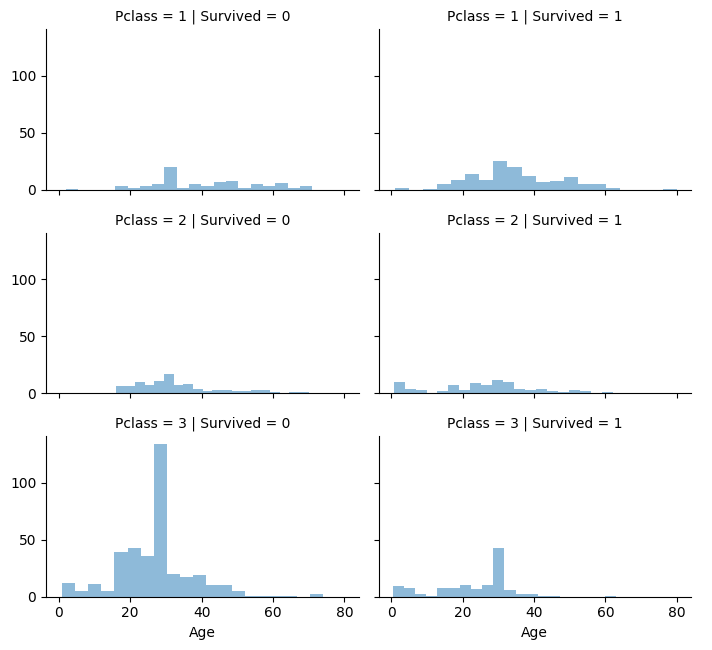

In [45]:
grid = sns.FacetGrid(train, col='Survived',
row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [47]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])

In [48]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [63]:
import pandas as pd
from sklearn import preprocessing
MinMaxscaler = preprocessing.MinMaxScaler()#MinMax or Standard, or Robust or Normalizer
MinMax_df = MinMaxscaler.fit_transform(df)
standardscaler = preprocessing.StandardScaler()#MinMax or Standard, or Robust or Normalizer
standard_df = standardscaler.fit_transform(df)
Robustscaler = preprocessing.RobustScaler()#MinMax or Standard, or Robust or Normalizer
Robust_df = Robustscaler.fit_transform(df)

print(df)
print(MinMax_df)
print(standard_df)
print(Robust_df)

   column_a  column_b  column_e
0       1.0      1.20         1
1       2.0      1.40         2
2       4.0      2.84         3
3       4.0      6.20         4
4       3.4      2.84         3
5       3.4      1.10         5
6       6.0      4.30         3
[[0.         0.01960784 0.        ]
 [0.2        0.05882353 0.25      ]
 [0.6        0.34117647 0.5       ]
 [0.6        1.         0.75      ]
 [0.48       0.34117647 0.5       ]
 [0.48       0.         1.        ]
 [1.         0.62745098 0.5       ]]
[[-1.62869014 -0.94211097 -1.67332005]
 [-0.95006925 -0.82721938 -0.83666003]
 [ 0.40717254  0.          0.        ]
 [ 0.40717254  1.93017856  0.83666003]
 [ 0.          0.          0.        ]
 [ 0.         -0.99955676  1.67332005]
 [ 1.76441432  0.83870854  0.        ]]
[[-1.84615385 -0.72246696 -2.        ]
 [-1.07692308 -0.63436123 -1.        ]
 [ 0.46153846  0.          0.        ]
 [ 0.46153846  1.48017621  1.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.76651

In [57]:
df.drop('column_d',axis=1,inplace=True)

In [58]:
df

,column_a,column_b,column_e
0,1.0,1.20,1
1,2.0,1.40,2
2,4.0,2.84,3
3,4.0,6.20,4
4,3.4,2.84,3
5,3.4,1.10,5
6,6.0,4.30,3
